<a href="https://colab.research.google.com/github/paulorc-silva/Conteudos-Sobre-Dados--Impacta/blob/master/Projeto_DS_Time_Series_Contratacoes_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AP2 de Ciência de Dados

* Déborah Yamazaki Hukuda
* Isaque Ribeiro dos Santos Junior
* Marcelo Martinez Mesa Campos
* Paulo Ricardo Costa da Silva

Este projeto busca analisar de série temporal das contratações efetuadas em todo o território nacional, no período de 01/2012 a 01/2024. Tal análise será implementada com uma rede neural LSTM.

## Importando as bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
warnings.filterwarnings("ignore")

## Lendo a base de dados

In [ ]:
df = pd.read_csv('/content/dataset-rede-neural-lstm.csv', index_col='Mes', parse_dates=True)
df

,Total Contratacao
Mes,
2012-01-01,88011
2012-02-01,88846
2012-03-01,89379
2012-04-01,89647
2012-05-01,89786
...,...
2023-09-01,100508
2023-10-01,100985
2023-11-01,100593


In [ ]:
df = df.sort_values(by='Mes')

## Analisando a série temporal

### Analisando o sinal completo

Abaixo estão algumas observações que podemos fazer em termos simples:


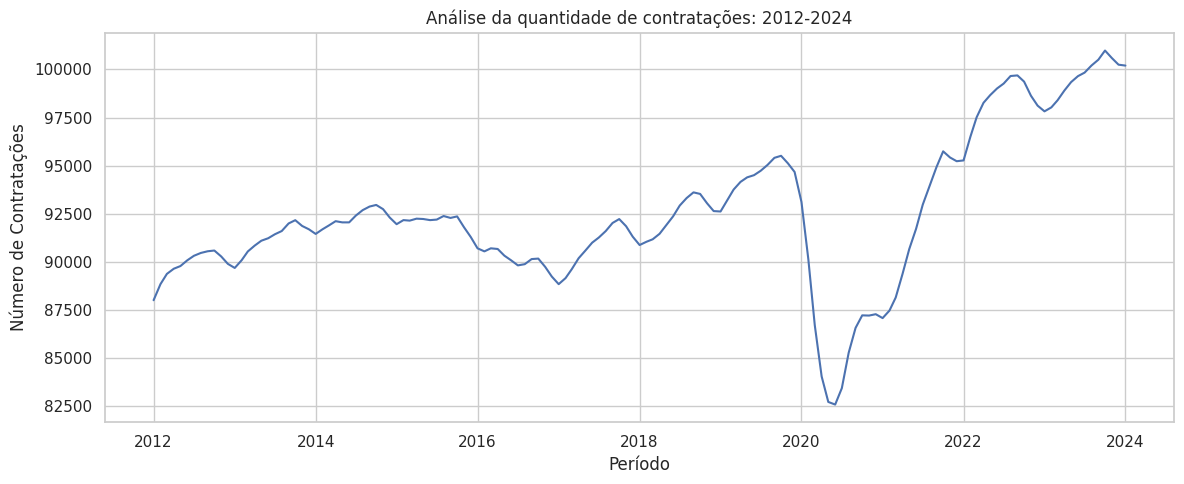

In [ ]:
# Configurando o estilo do gráfico
sns.set(style='whitegrid')

# Criando a visualização
plt.figure(figsize=(12, 5))
sns.lineplot(x='Mes', y='Total Contratacao', data=df)
plt.title('Análise da quantidade de contratações: 2012-2024')
plt.xlabel('Período')
plt.ylabel('Número de Contratações')
plt.tight_layout()
plt.show()

1. **Tendência:** A série mostra um aumento geral no número de contratações ao longo do tempo, exceto no período de 12/2019 a 08/2020, tal qual ocorreu a pandemia de Covid-19. Isso indica que, de um modo geral, o mercado de trabalho está em constante crescimento e sempre se adaptando às flutuações.

2. **Padrões (sazonalidade):** Há flutuações claras e razoavelmente regulares que sugerem uma sazonalidade. Isso significa que o número de contratações aumenta e diminui em padrões previsíveis a cada ano. Geralmente, isso pode estar relacionado a épocas de eleição ou eventos anuais que afetam as contratações, como a pandemia de Covid-19.

3. **Variações (ruído):** Enquanto a tendência geral é de crescimento e a sazonalidade é razoavelmente regular, também há variações que não seguem o padrão exato a cada ano. Isso pode ser devido a muitos fatores, como mudanças no mercado, lay-offs, eventos econômicos ou políticos, entre outros.

### Decompondo a série

In [ ]:
# Decompondo a série temporal
result = seasonal_decompose(df['Total Contratacao'])

In [ ]:
df_decomp = df.copy()

df_decomp['tendencia'] = result.trend.values
df_decomp['sazonalidade'] = result.seasonal.values
df_decomp['residuos'] = result.resid.values

### Analisando a Tendência

A tendência refere-se à direção geral que os dados seguem ao longo de um período. Pode ser ascendente, descendente ou estável. Identificar a tendência ajuda a compreender o comportamento de longo prazo da série temporal. Métodos como médias móveis, regressão linear e técnicas de suavização exponencial são frequentemente utilizados para estimar a tendência e facilitar a visualização da direção geral dos dados. Por exemplo, veja o seguinte gráfico de tendência:

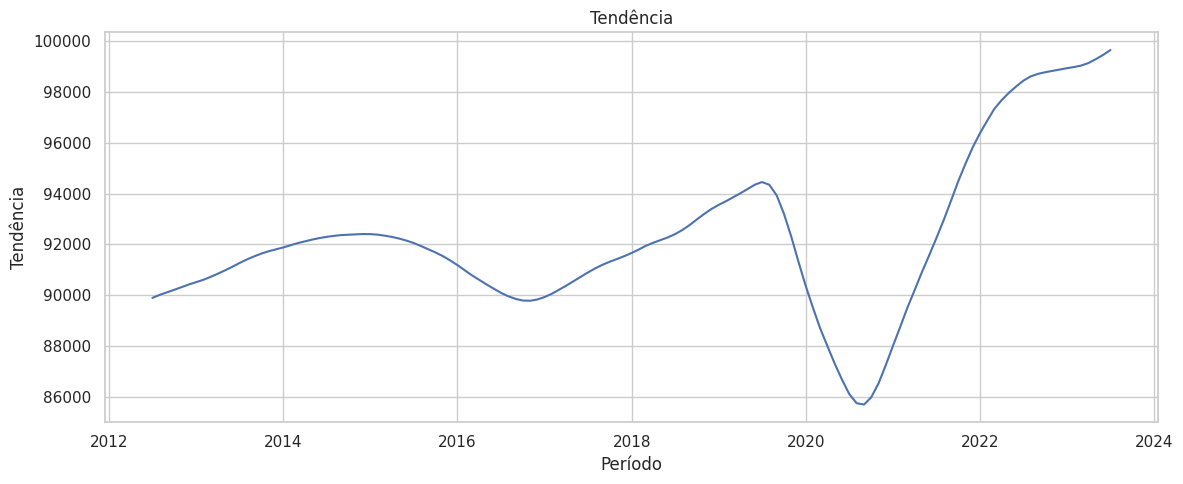

In [ ]:
# Tendência
plt.figure(figsize=(12, 5))
plt.plot(df_decomp['tendencia'], label='Tendência')
plt.title('Tendência')
plt.ylabel('Tendência')
plt.xlabel('Período')
plt.tight_layout()
plt.show()

Nesse gráfico podemos observar:

- **Crescimento contínuo:** A tendência geral mostra um aumento no número de contratações ao longo do tempo. A linha de tendência ascendente sugere que, de modo geral, mais contratações estão sendo realizadas ao longo dos anos representados no gráfico.

- **Variação suave:** Embora haja flutuações no número de contratações, a linha de tendência apresenta uma variação relativamente suave na maior parte do período, o que facilita a avaliação do crescimento ao longo do tempo sem oscilações abruptas.

- **Impacto da pandemia:** Entre o final de 2019 e meados de 2020, há uma queda acentuada no número de contratações, que coincide com a pandemia de Covid-19. Este período destaca uma interrupção significativa na tendência de crescimento, refletindo o impacto dos eventos extraordinários.

- **Recuperação rápida:** Após a queda durante a pandemia, observa-se uma recuperação rápida e robusta, com o número de contratações aumentando substancialmente. Isso sugere uma resiliência do mercado de trabalho e uma adaptação às novas condições pós-pandemia.

- **Estabilização recente:** Nos últimos anos do período analisado, a tendência de crescimento continua, embora em um ritmo mais moderado, indicando uma possível estabilização em um novo patamar de crescimento sustentado.

**CONCLUSÃO:** Essa análise geral do gráfico evidencia um mercado de trabalho em crescimento contínuo, com uma recuperação significativa após a pandemia, e uma estabilização recente sem flutuações bruscas ou eventos extraordinários que impactem de forma duradoura o número de contratações.

### Analisando a Sazonalidade

A sazonalidade representa os padrões ou ciclos que se repetem em intervalos regulares dentro dos dados, como diariamente, semanalmente, mensalmente ou sazonalmente. A análise de sazonalidade é vital para identificar comportamentos recorrentes que podem influenciar as previsões. Métodos de decomposição sazonal, como a decomposição clássica e a Decomposição de Séries Temporais Sazonais e Tendências (STL), permitem isolar e examinar esses padrões cíclicos.Por exemplo, veja o seguinte gráfico de sazonalidades:

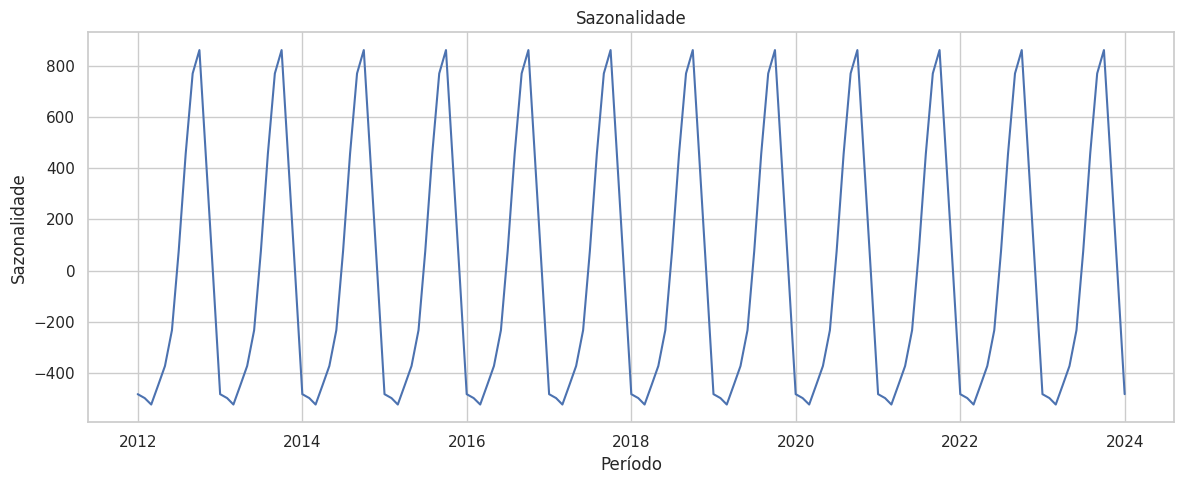

In [ ]:
# Sazonalidade
plt.figure(figsize=(12, 5))
plt.plot(df_decomp['sazonalidade'], label='Sazonalidade')
plt.title('Sazonalidade')
plt.ylabel('Sazonalidade')
plt.xlabel('Período')
plt.tight_layout()
plt.show()

Nesse gráfico podemos observar:

- **Padrão de sazonalidade:** A curva apresenta um padrão claramente sazonal, com picos e vales que se repetem em intervalos regulares. Isso indica que o número de contratações varia de forma previsível em determinados períodos do ano.

- **Ciclos anuais:** Os picos ocorrem aproximadamente uma vez por ano, sugerindo que há um aumento no número de contratações em períodos específicos de cada ano. Da mesma forma, os vales ocorrem uma vez por ano, indicando uma redução no número de contratações nos mesmos períodos de cada ano.

- **Amplitude constante:** A amplitude das variações sazonais permanece relativamente constante ao longo dos anos, com a diferença entre os picos e os vales sendo semelhante de ano para ano. Isso sugere que a intensidade da sazonalidade não mudou significativamente ao longo do tempo.

- **Ausência de flutuações bruscas:** Não há variações bruscas fora do padrão sazonal esperado. Isso indica que, além dos ciclos sazonais regulares, não houve eventos extraordinários que tivessem um impacto significativo e duradouro no padrão de contratações.

- **Regularidade e previsibilidade:** A regularidade da curva de sazonalidade facilita a previsão das variações no número de contratações ao longo do ano. Esse padrão pode ser útil para planejamento e tomada de decisões em recursos humanos e outras áreas relacionadas.

**CONCLUSÃO:** A análise da curva de sazonalidade revela um padrão anual estável e previsível nas contratações. A presença de picos e vales anuais regulares indica que o mercado de trabalho segue um ciclo sazonal consistente, com aumentos e diminuições previsíveis no número de contratações. A ausência de flutuações bruscas sugere que não houve eventos extraordinários que impactassem significativamente esse padrão ao longo do período analisado.

### Analisando os Ruídos

O ruído em uma série temporal é a variação aleatória ou os componentes irregulares que restam após a remoção dos efeitos da tendência e da sazonalidade. Essencialmente, é a flutuação nos dados que não pode ser atribuída a padrões sistemáticos. O ruído pode ser causado por variáveis não observadas ou aleatoriedade inerente ao sistema. Analisar o ruído é importante para entender a imprevisibilidade nos dados e melhorar a precisão dos modelos de previsão. Por exemplo, veja o seguinte gráfico de resíduos:

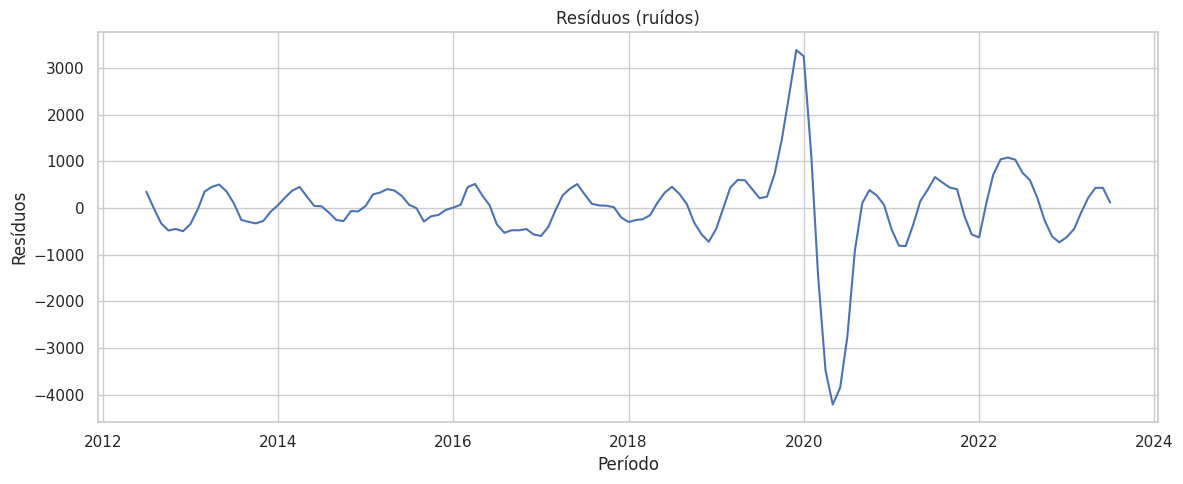

In [ ]:
# Resíduo
plt.figure(figsize=(12, 5))
plt.plot(df_decomp['residuos'], label='Resíduos')
plt.title('Resíduos (ruídos)')
plt.ylabel('Resíduos')
plt.xlabel('Período')
plt.tight_layout()
plt.show()

Nesse gráfico podemos observar:

- **Flutuações menores ao longo do tempo:** A maior parte dos resíduos apresenta flutuações relativamente pequenas em torno da linha zero, indicando que a maioria das variações ao longo do tempo está bem explicada pelas componentes de tendência e sazonalidade.

- **Pico e queda acentuados em 2020:** Um aspecto notável é a grande variação nos resíduos ao redor de 2020, onde há um pico seguido por uma queda acentuada. Este período coincide com a pandemia de Covid-19, que causou impactos significativos e inesperados no número de contratações, gerando ruídos que não são explicados pelas componentes de tendência e sazonalidade.

- **Padrões menores e irregulares:** Fora o impacto significativo em 2020, os resíduos apresentam padrões menores e irregulares, sugerindo a presença de outros fatores que afetam o número de contratações de maneira menos previsível e que não são capturados pelas componentes principais.

- **Retorno à normalidade:** Após o grande desvio em 2020, os resíduos voltam a flutuar em torno da linha zero, indicando uma recuperação e estabilização do mercado de trabalho após o evento extraordinário da pandemia.

**CONCLUSÃO:** A análise dos resíduos revela que a decomposição dos valores reais em tendência e sazonalidade é eficaz na captura da maioria das variações no número de contratações. No entanto, eventos extraordinários como a pandemia de Covid-19 introduzem grandes desvios que se refletem como picos e quedas acentuadas nos resíduos. Fora esses eventos, os resíduos são relativamente pequenos e indicam um retorno à normalidade, com variações menores e irregulares não explicadas pelas componentes principais.

## Modelagem da rede neural LSTM

### Explorando os dados

In [ ]:
df

,Total Contratacao
Mes,
2012-01-01,88011
2012-02-01,88846
2012-03-01,89379
2012-04-01,89647
2012-05-01,89786
...,...
2023-09-01,100508
2023-10-01,100985
2023-11-01,100593


In [ ]:
len(df)

145

In [ ]:
print(f'Quantidade de meses antes da pandemia (3 meses de margem de erro): {len(df[:"2019-09-01"])}')
print(f'Quantidade de meses a partir da pandemia (3 meses de margem de erro): {len(df["2019-10-01":])}')

Quantidade de meses antes da pandemia (3 meses de margem de erro): 93
Quantidade de meses a partir da pandemia (3 meses de margem de erro): 52


### Normalizando os dados

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(df).reshape(-1, 1))

### Prevendo se a pandemia de Covid-19 influenciou no número de contratações

#### Dividindo em treino e teste


In [ ]:
look_back = 12 # Quantidade de meses que usará para prever o próximo mes
train_size = 93 # Quantidade de meses antes da pandemia
test_size = 52 # Quantidade de meses a partir do inicio da pandemia

In [ ]:
train_data = scaled_data[:train_size, 0:1] # Dados antes da pandemia (inicio - 01/01/2020)
test_data =  scaled_data[train_size-look_back-1:, 0:1] # Dados a partir da pandemia (01/02/2020 - final)

#### Criando as sequências de treino e teste

In [ ]:
def create_sequence(data, look_back=1):
    x = []
    y = []

    for i in range(look_back, len(data)):
        x.append(data[i-look_back:i, 0])
        y.append(data[i, 0])

    return np.array(x), np.array(y)

In [ ]:
x_train, y_train = create_sequence(train_data, look_back)
x_test, y_test = create_sequence(test_data, look_back)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#### Treinando e avaliando a rede

In [ ]:
model = Sequential()

model.add(LSTM(units=128, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=128, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(0.001), metrics='mean_absolute_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 128)           66560     
                                                                 
 dropout_4 (Dropout)         (None, 12, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                

In [ ]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
3/3 [==============================] - 5s 58ms/step - loss: 0.1822 - mean_absolute_error: 0.4138
Epoch 2/200
3/3 [==============================] - 0s 58ms/step - loss: 0.0606 - mean_absolute_error: 0.1975
Epoch 3/200
3/3 [==============================] - 0s 57ms/step - loss: 0.0584 - mean_absolute_error: 0.2007
Epoch 4/200
3/3 [==============================] - 0s 61ms/step - loss: 0.0372 - mean_absolute_error: 0.1448
Epoch 5/200
3/3 [==============================] - 0s 132ms/step - loss: 0.0415 - mean_absolute_error: 0.1555
Epoch 6/200
3/3 [==============================] - 0s 141ms/step - loss: 0.0275 - mean_absolute_error: 0.1305
Epoch 7/200
3/3 [==============================] - 0s 96ms/step - loss: 0.0436 - mean_absolute_error: 0.1781
Epoch 8/200
3/3 [==============================] - 0s 63ms/step - loss: 0.0264 - mean_absolute_error: 0.1258
Epoch 9/200
3/3 [==============================] - 0s 97ms/step - loss: 0.0327 - mean_absolute_error: 0.1427
Epoch 10/200
3/3 

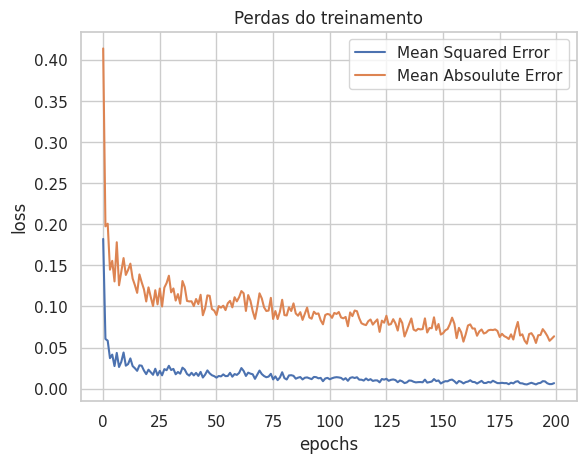

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error', 'Mean Absoulute Error'])
plt.title('Perdas do treinamento')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
predictions = model.predict(x_test)

2/2 [==============================] - 1s 14ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
y_test = scaler.inverse_transform([y_test])

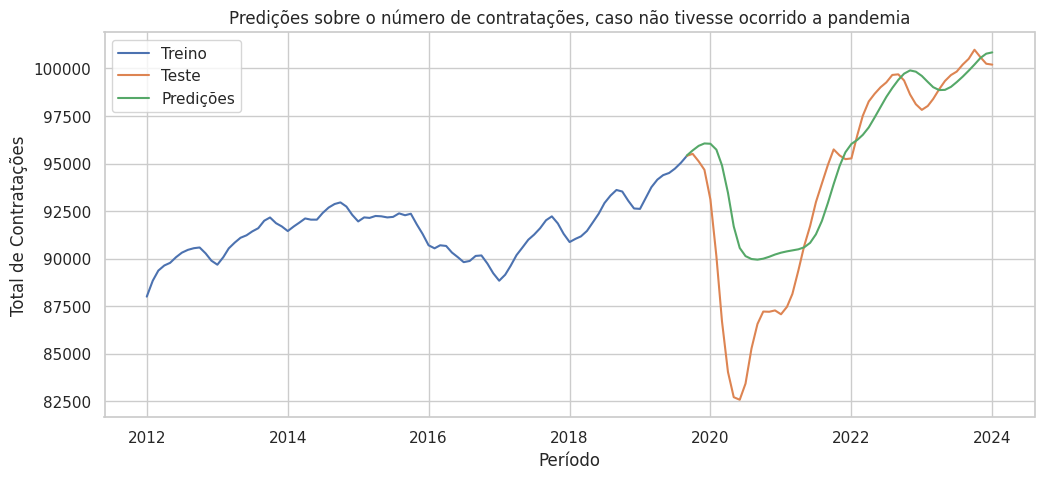

In [ ]:
train = df.iloc[:train_size]
test = df.iloc[train_size-1:]

test['Prediction'] = predictions+900 # Como o teste começa com um valor abaixo, a gente soma a diferença par alinhar as linhas

plt.figure(figsize=(12, 5))
plt.title('Predições sobre o número de contratações, caso não tivesse ocorrido a pandemia')
plt.xlabel('Período')
plt.ylabel('Total de Contratações')
plt.plot(train['Total Contratacao'])
plt.plot(test['Total Contratacao'])
plt.plot(test['Prediction'])
plt.legend(['Treino', 'Teste', 'Predições'])
plt.show()

### Prevendo os números de contratações até 01/2026

#### Criando a sequência dos dados

In [ ]:
look_back = 12 # Quantidade de meses que usará para prever o próximo mes
full_data = scaled_data[:, 0:1]
x, y = create_sequence(full_data, look_back)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

#### Treinando e avaliando a rede

In [ ]:
model = Sequential()

model.add(LSTM(units=128, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=128, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(0.01), metrics='mean_absolute_error')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 12, 128)           66560     
                                                                 
 dropout_20 (Dropout)        (None, 12, 128)           0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                

In [ ]:
history = model.fit(x, y, epochs=200, batch_size=32)

Epoch 1/200
5/5 [==============================] - 5s 35ms/step - loss: 0.2641 - mean_absolute_error: 0.4548
Epoch 2/200
5/5 [==============================] - 0s 37ms/step - loss: 0.0781 - mean_absolute_error: 0.2130
Epoch 3/200
5/5 [==============================] - 0s 35ms/step - loss: 0.0876 - mean_absolute_error: 0.2297
Epoch 4/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0647 - mean_absolute_error: 0.1960
Epoch 5/200
5/5 [==============================] - 0s 38ms/step - loss: 0.0510 - mean_absolute_error: 0.1768
Epoch 6/200
5/5 [==============================] - 0s 34ms/step - loss: 0.0358 - mean_absolute_error: 0.1464
Epoch 7/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0348 - mean_absolute_error: 0.1438
Epoch 8/200
5/5 [==============================] - 0s 35ms/step - loss: 0.0317 - mean_absolute_error: 0.1268
Epoch 9/200
5/5 [==============================] - 0s 35ms/step - loss: 0.0363 - mean_absolute_error: 0.1471
Epoch 10/200
5/5 [=

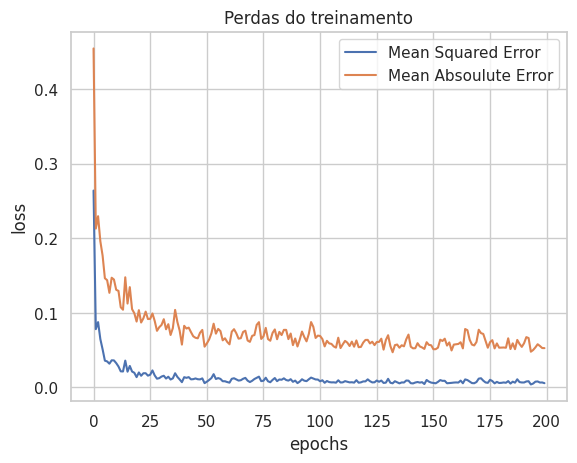

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error', 'Mean Absoulute Error'])
plt.title('Perdas do treinamento')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
future_months = 25
future_data = full_data[-look_back:].tolist()

for _ in range(future_months):
    x_future = np.array(future_data[-look_back:]).reshape(1, look_back, 1)
    prediction = model.predict(x_future)[0][0]
    future_data.append([prediction])

1/1 [==============================] - 0s 25ms/step


In [ ]:
future_predictions = scaler.inverse_transform(future_data)

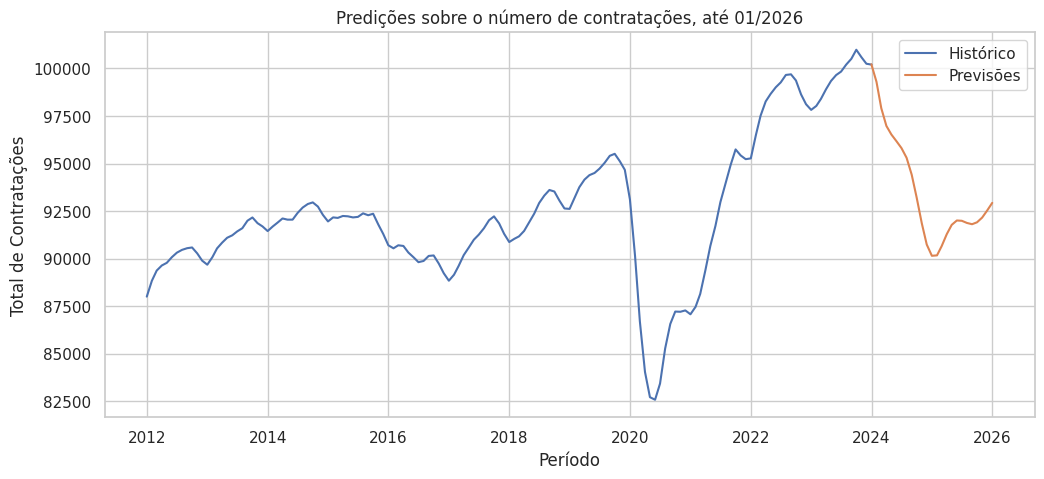

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Predições sobre o número de contratações, até 01/2026')
plt.xlabel('Período')
plt.ylabel('Total de Contratações')
plt.plot(df.index, scaler.inverse_transform(full_data), label='Histórico')
plt.plot(pd.date_range(start=df.index[-3], periods=future_months+1, freq='M')[1:], future_predictions[look_back:] + 1400, label='Previsões')
plt.legend()
plt.show()